
# Capstone Project: Predicting Severity of Road Accidents.

## Introduction

Road accidents are a very common problem in todays day and age. The severity of accidents varies from minor(which can result in a scratch on your car) to fatal(which can lead to a loss of life). I think we can all agree that we would all love to prevent accidents from occurring and so I would like to share with you my aim for this project. My aim is to build a model that can help us understand the severity of an accident and why it has happened. The target audience that my model would be helpful would be the local authority. This is because they can find the cause of accidents and find ways to prevent them from occurring.

## Data

We will use the data from a database that contains information about UK car accidents from 2005-2015. 
The database contains:
*  Number of accidents
*  Number of accidents on each day of the week
*  Number of casualties
*  Type of casualties (pedestrian, civillian,etc)
*  and much more

## Methadology 

We will first need to import all the data and clean it up

### Importing data and cleaning 
Importing 3 data files about Accidents, Casualties and Vehicles.

Delating false lines.
Delating cases where values are (-1).

In [5]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pandas import DataFrame, read_csv

import warnings
warnings.filterwarnings('ignore')
accidents=pd.read_csv('../input/dft-accident-data/Accidents0515.csv')
casualties=pd.read_csv('../input/dft-accident-data/Casualties0515.csv' , error_bad_lines=False,warn_bad_lines=False)
vehicles=pd.read_csv('../input/dft-accident-data/Vehicles0515.csv', error_bad_lines=False,warn_bad_lines=False)

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])
    
for col in vehicles.columns:
    vehicles = (vehicles[vehicles[col]!=-1])
    

# Basic data

# 1. Sum of the accidents

First we must understand what the total number of accidents were during the period of 2005-2015. This is the first thing we much do as we need to understand whether the number is big or small. If the number is big we must then try to understand why it is as big as it is

In [6]:
sum=len(accidents)
print("Number of accidents:", sum)

Number of accidents: 1045076


We can see that the total number of accidents between 2005-2015 was 1,045,076

# 2. Number of accidents in time interval

Now that we know how many accidents have occurred between 2005-2015, we now need to know how many have occurred each year. This is important as we need to see if theres a trend such as increasing every year or decreasing every year. If it is increasing we need to find out why it is.

Text(0.5, 0, 'Years')

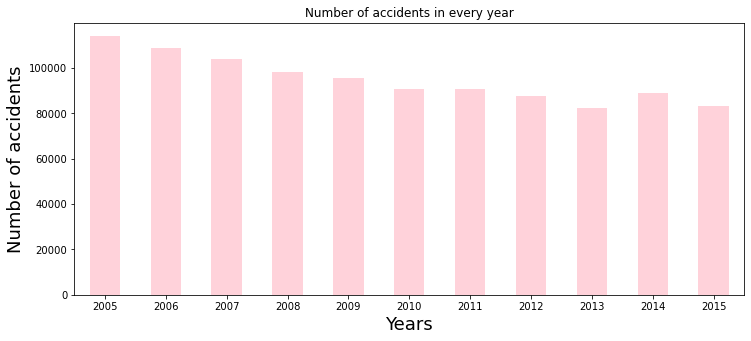

In [7]:
years = accidents.loc[:,'Date'].groupby(accidents['Date'].map(lambda x: x[6:10])).count()
years=pd.DataFrame(data=years)
years['Year']=years.index
years.columns=['Accidents', 'Year']

years.plot(kind='bar',color="pink", alpha=0.7, title='Number of accidents in every year', figsize=(12,5), legend=False, rot=0)
plt.ylabel('Number of accidents' , fontsize = 18)
plt.xlabel('Years', fontsize = 18)

We can see that there has been a general decrease in number of accidents froom 2005-2015. Although there have been increases at some points (such as from 2013-2014).

Text(0, 0.5, 'Number of accidents')

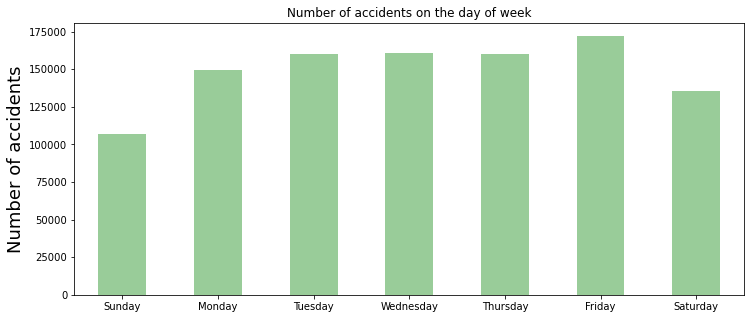

In [8]:
days = accidents.loc[:,'Day_of_Week'].groupby(accidents['Day_of_Week']).count()
days=pd.DataFrame(data=days)
days['days']=days.index
days.columns=['Accidents', 'Days']
days['Days']=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
days.index=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
days.plot(kind='bar',color='green', alpha=0.4, title='Number of accidents on the day of week', figsize=(12,5), legend=False, width=0.5, rot=0)
plt.ylabel('Number of accidents' , fontsize = 18)


I wanted to figure out then that if there was a trend of what day had the most accident. For example would weekdays have more accidents or weekends. From the graph we can see that the most accidents occured on Friday, my presumption would be that it could be that people are rushing to get home as the weekend starts the next day. Surprisingly, the day with the least accidents was Sunday.

# 3. Percentage of accidents in speed zone

I then wanted to use the data given, to find out in what speed zone were the accidents more predominant in.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18b2991910>],
      dtype=object)

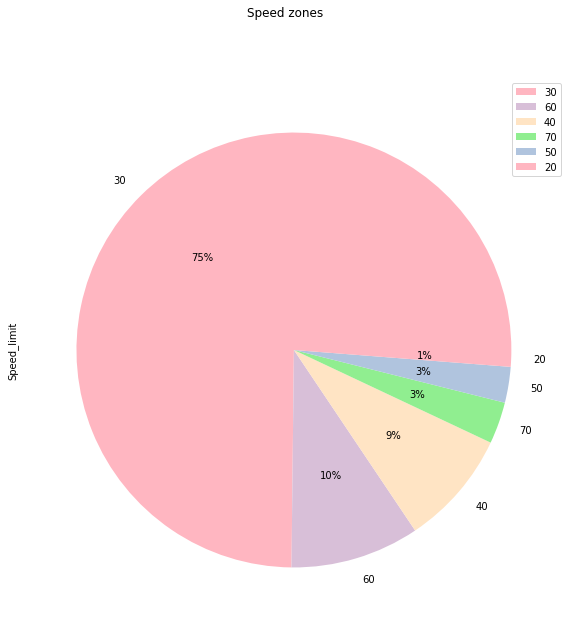

In [9]:
speed1 = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])] 
speed = speed1.Speed_limit.value_counts()
speed.plot(kind='pie', subplots=True, figsize=(10,10), colors=['lightpink', 'thistle','bisque', 'lightgreen','lightsteelblue'],  autopct='%1.0f%%', title="Speed zones",legend=True)

### Type of road 

We need to see what type of road has the most accidents in, this is to ensure more safe measures are implemented in roads that are having the most accidents 

Text(0.5, 0, 'Accidents')

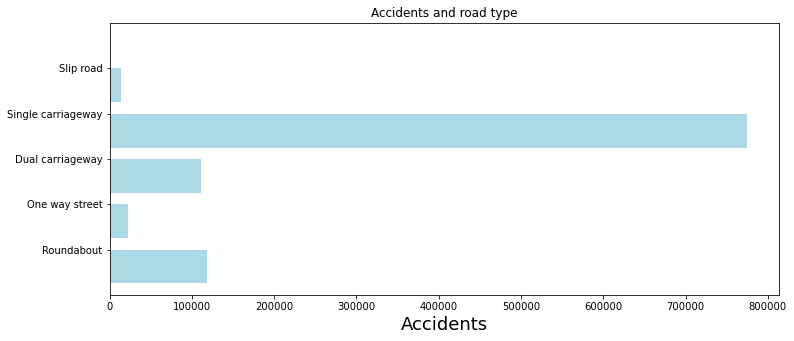

In [12]:
road=accidents[accidents.Road_Type!=9] # deleting rows:'not known'
road1 = road.loc[:,'Road_Type'].groupby(road['Road_Type']).count()

road=pd.DataFrame(data=road1)
road['road']=road.index
road.columns=['Accidents', 'road']
road.index=['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road']
road.plot(kind='barh',  title='Accidents and road type', figsize=(12,5), legend=False, color='lightblue', alpha=1, width=1.5)
plt.xlabel('Accidents' , fontsize = 18)


# 4. Information regarding sexes of both drivers and casualties

4.1 The Driver

   driver   number
0  Female   526417
1    Male  1025902


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18b28d87d0>],
      dtype=object)

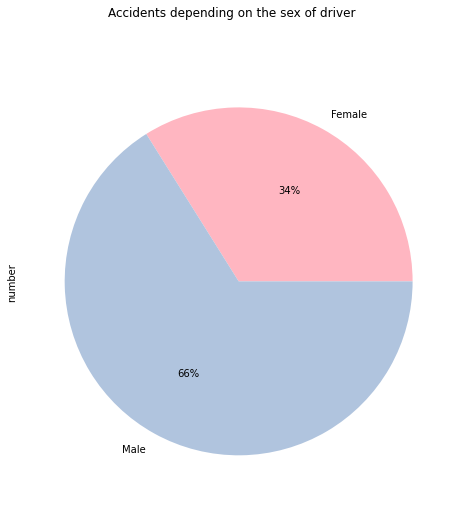

In [11]:
sex_d=vehicles['Sex_of_Driver']
kobiety=0
for x in sex_d:
    if x==2:
        kobiety=kobiety+1
mez=0
for x in sex_d:
    if x==1:
        mez=mez+1

sex_table = pd.DataFrame({'driver': ['Female','Male'],'number':[kobiety,mez]})
print(sex_table)

sex_table.set_index('driver', inplace=True)
sex_table['number'].plot(kind='pie', subplots=True, figsize=(8, 8), colors=['lightpink', 'lightsteelblue'], autopct='%1.0f%%', title="Accidents depending on the sex of driver")

4.2 Casualties

   driver  number
0  Female  281897
1    Male  399746


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18b289c710>],
      dtype=object)

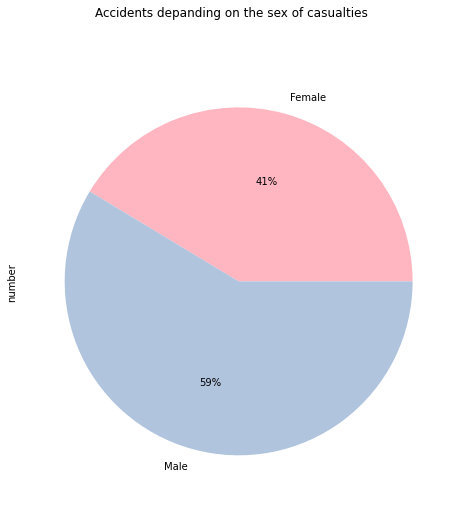

In [13]:
sex_c=casualties['Sex_of_Casualty']
kobiety=0
for x in sex_c:
    if x==2:
        kobiety=kobiety+1
mez=0
for x in sex_c:
    if x==1:
        mez=mez+1

sex_table = pd.DataFrame([{'driver': 'Female','number':kobiety},
                {'driver': 'Male','number':mez}])
print(sex_table)

sex_table.set_index('driver', inplace=True)
sex_table['number'].plot(kind='pie', subplots=True, figsize=(8, 8), colors=['lightpink', 'lightsteelblue'], autopct='%1.0f%%', title="Accidents depanding on the sex of casualties")

Text(0, 0.5, 'Number of casualties')

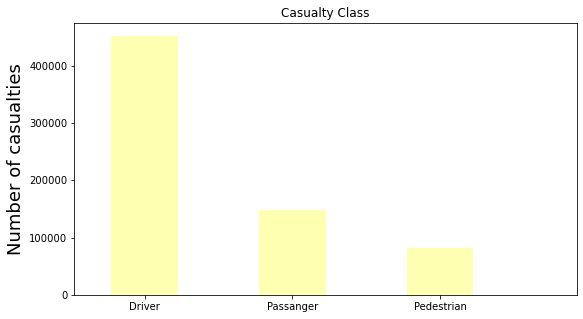

In [14]:
poszk1 = casualties.loc[:,'Casualty_Class'].groupby(casualties['Casualty_Class']).count()

poszkod=pd.DataFrame(data=poszk1)
poszkod['poszkod']=poszkod.index
poszkod.columns=['Accidents', 'type']
poszkod.index=['Driver','Passanger','Pedestrian']
poszkod.plot(kind='bar',  title='Casualty Class', figsize=(9,5), legend=0, color='yellow',alpha=0.3, width=0.9, rot=0,position=0.25)

plt.ylabel('Number of casualties', fontsize = 18)


# Who was the casualty?

A further analysis on the gender of each casualty

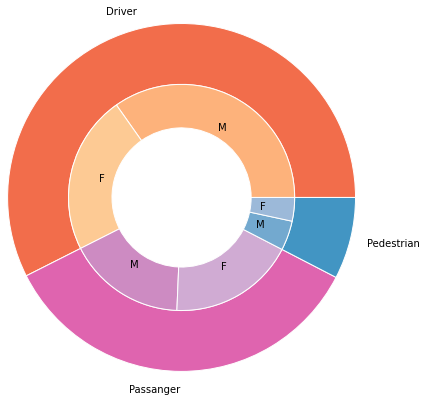

In [15]:
plec=casualties.loc[:,['Accident_Index','Sex_of_Casualty']]
poszkodowani=casualties.loc[:,['Accident_Index','Casualty_Class']]
tabelka1=pd.merge(poszkodowani, plec, on='Accident_Index')

def wybrane_nr(dane, number1,number2, what1, what2):
    table=dane[dane[what1]==number1]
    table=table[table[what2]==number2]    
    return (table.count())[what1]

m1=wybrane_nr(tabelka1,1,1,'Casualty_Class','Sex_of_Casualty')
m2=wybrane_nr(tabelka1,2,1,'Casualty_Class','Sex_of_Casualty')
m3=wybrane_nr(tabelka1,3,1,'Casualty_Class','Sex_of_Casualty')
k1=wybrane_nr(tabelka1,1,2,'Casualty_Class','Sex_of_Casualty')
k2=wybrane_nr(tabelka1,2,2,'Casualty_Class','Sex_of_Casualty')
k3=wybrane_nr(tabelka1,3,2,'Casualty_Class','Sex_of_Casualty')

group_names=['Driver', 'Passanger', 'Pedestrian']
group_size=[m1+k1,m2+k2,m3+k3]
subgroup_names=['M', 'F','M', 'F','M', 'F']
subgroup_size=[m1,k1,m2,k2,m3,k3]
 

a, b, c=[plt.cm.OrRd, plt.cm.PuRd, plt.cm.PuBu]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2, labels=group_names, colors=[a(0.6), b(0.5), c(0.6)])
plt.setp( mypie,width=0.7, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, labels=subgroup_names, labeldistance=0.7,colors=[a(0.4), a(0.3), b(0.4), b(0.3), c(0.5), c(0.4)])
plt.setp( mypie2, width=0.5, edgecolor='white') 
plt.show()

# 5. Accidents, age and journey purpose

Text(0.6, 0.98, 'Accidents, age, journey purpose')

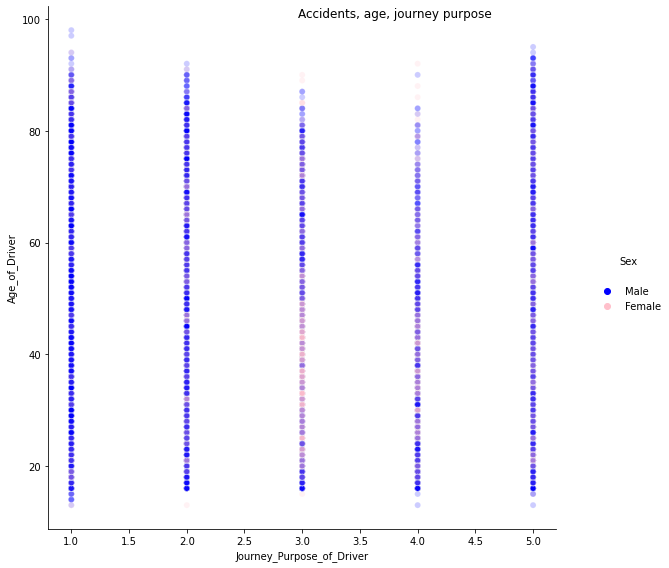

In [16]:
pojazdy=vehicles[vehicles.Journey_Purpose_of_Driver!=15] 
pojazdy=pojazdy[vehicles.Journey_Purpose_of_Driver!=6] 
pojazdy=pojazdy[pojazdy.Sex_of_Driver!=0]
pojazdy=pojazdy[pojazdy.Sex_of_Driver!=3]

g=sns.relplot(x='Journey_Purpose_of_Driver', y='Age_of_Driver', data=pojazdy, hue='Sex_of_Driver', legend="full",palette=['blue','pink'],alpha=.2,  height=8)

new_title = 'Sex'
g._legend.set_title(new_title)
# zmiana nazwy
new_labels = ['', 'Male', 'Female']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.fig.suptitle("Accidents, age, journey purpose", x=.6, y=0.98)


Blue means the accidents caused by male.                           

If colour is more pink, more females caused the accidents in particular age.

Violet means similar number of men and women caused accidents.

In [23]:
table={'number':['1', '2', '3', '4','5'],
       'journey purpose':['Journey as part of work','Commuting to/from work','Taking pupil to/from school','Pupil riding to/from school', 'Other']}
journey_porpuse=pd.DataFrame.from_dict(table)
journey_porpuse

,number,journey purpose
0,1,Journey as part of work
1,2,Commuting to/from work
2,3,Taking pupil to/from school
3,4,Pupil riding to/from school
4,5,Other


# 6. Age

Text(0.5, 0, 'Age of drivers')

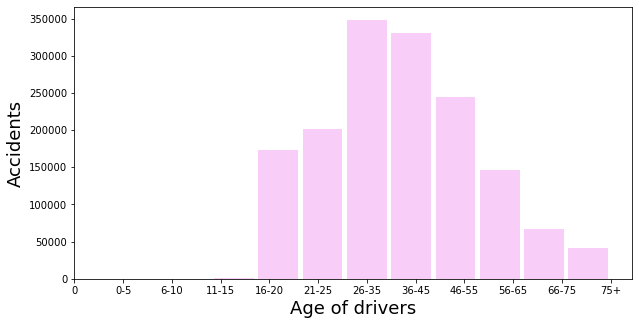

In [18]:
band = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']
vehicles.Age_Band_of_Driver.hist(bins=11, color='violet', alpha=0.4, rwidth=0.9, figsize=(10,5))
plt.grid(False)
y = np.arange(len(band))
plt.xticks(y , band)

plt.ylabel('Accidents' , fontsize = 18)
plt.xlabel('Age of drivers', fontsize = 18)

Text(0.5, 0, 'Age of casualties')

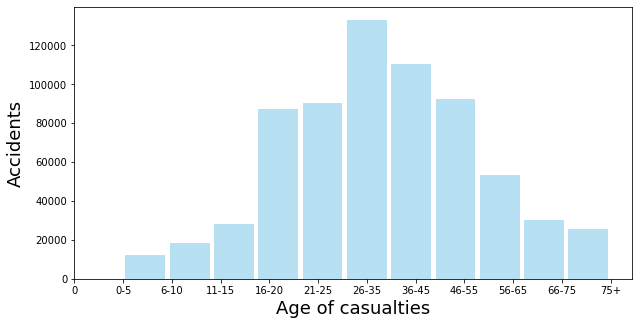

In [19]:
band = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']
casualties.Age_Band_of_Casualty.hist(bins=11, color='skyblue', alpha=0.6, rwidth=0.9, figsize=(10,5))
plt.grid(False)
y = np.arange(len(band))
plt.xticks(y , band)

plt.ylabel('Accidents' , fontsize = 18)
plt.xlabel('Age of casualties', fontsize = 18)

# Accident severity

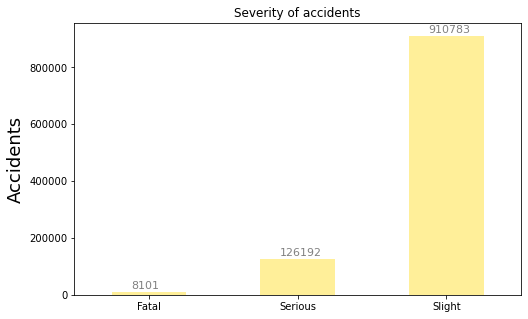

In [20]:
accident_sev=pd.read_csv('../input/dft-accident-data/Accidents0515.csv')

waga = accidents.loc[:,'Accident_Severity'].groupby(accidents['Accident_Severity']).count()

waga=pd.DataFrame(data=waga)
waga['Accident']=waga.index

waga.columns=['Accidents', 'Accident_Severity']
waga['Accident_Severity']=['Fatal','Serious','Slight']
waga.index=['Fatal','Serious','Slight']

w=waga.plot(kind='bar',color='gold',alpha=0.4,  title='Severity of accidents', figsize=(8,5), legend=False, width=0.5, rot=0)
plt.ylabel('Accidents' , fontsize = 18)
plt.xlabel('')


for i in w.patches:
    
    w.text(i.get_x()+.13, i.get_height()+12000, \
            str(round(i.get_height())), fontsize=11, color='grey', rotation=0)

# Co-relation between accidents severity and sex

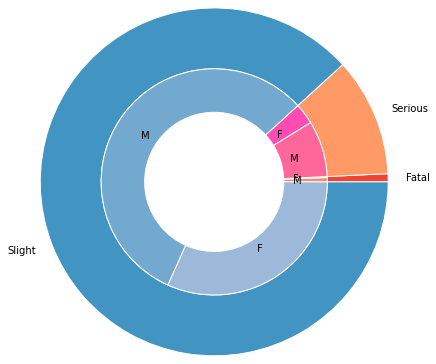

In [21]:
plec=vehicles.loc[:,['Accident_Index','Sex_of_Driver']]
powaga=accidents.loc[:,['Accident_Index','Accident_Severity']]
tabelka1=pd.merge(powaga, plec, on='Accident_Index')

m1=wybrane_nr(tabelka1,1,1,'Accident_Severity','Sex_of_Driver')
m2=wybrane_nr(tabelka1,2,1,'Accident_Severity','Sex_of_Driver')
m3=wybrane_nr(tabelka1,3,1,'Accident_Severity','Sex_of_Driver')
k1=wybrane_nr(tabelka1,1,2,'Accident_Severity','Sex_of_Driver')
k2=wybrane_nr(tabelka1,2,2,'Accident_Severity','Sex_of_Driver')
k3=wybrane_nr(tabelka1,3,2,'Accident_Severity','Sex_of_Driver')

group_names=['Fatal', 'Serious', 'Slight']
group_size=[m1+k1,m2+k2,m3+k3]
subgroup_names=['M', 'F','M', 'F','M', 'F']
subgroup_size=[m1,k1,m2,k2,m3,k3]
 

a, b, c=[plt.cm.Reds, plt.cm.spring, plt.cm.PuBu]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.7, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.4), a(0.3), b(0.4), b(0.3), c(0.5), c(0.4)])
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0) 
plt.show()


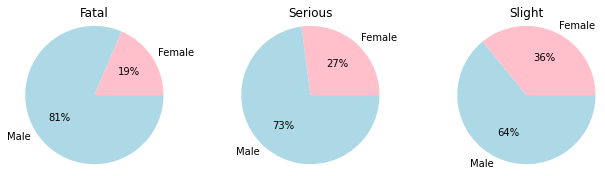

In [22]:
labels = 'Female', 'Male'
fracs1 = [k1,m1]
fracs2 = [k2,m2]
fracs3 = [k3,m3]


fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(fracs1, labels=labels, radius = 1.2, colors=['pink','lightblue'],autopct='%1.0f%%')
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(fracs2, labels=labels, radius = 1.2,colors=['pink','lightblue'],autopct='%1.0f%%')
ax3 = fig.add_axes([.0, .0, 2.5, 0.5], aspect=1)
ax3.pie(fracs3, labels=labels, radius = 1.2,colors=['pink','lightblue'],autopct='%1.0f%%')
ax1.set_title('Fatal')
ax2.set_title('Serious')
ax3.set_title('Slight')

plt.show()



## Results


The results have shown us alot of things. There are alot of surprises in these results. For example: Most accidents happened on Friday, whereas the least amount of accidents happened on Sunday. This may be that People are going out to places late night on friday and are too tired to drive back, so they aren't as alert or that they are rushing home as soon as possible from work. The results are important as we understood how severe the accidents were and where most of these accidents are happening

## Discussion

I've observed that the large amount of accidents happened in single carriageways(over 700,000). I would recommend local authority to review footage of these roads and inspect them further incase there as a more underlying reason for this. I think that there should be a bigger campaign for driving safely on Fridays as there is definitely a reason for why most accidents happen on that day. I also think people should be taught to be more aware, this is because 75% of accidents are happening in a speed zone of 30.  This means that people are not as aware on slower roads, thus a campaign about this would be very beneficial or more training in driving schools regarding this matter.

## Conclusion

Thanks to the database we were able to extract lots of information that will be valuable to the local authorities. Using this data they may decide to take action via campaign or more training, or even look at roads and see how they can be improved. Although crashes are not fatal, the information can be used by local authority to find ways to reduce accidents and even help predict the trend of whether they will increase or decrease in the years to come.